# "Euphotic zone residence time of Antarctic Bottom Water"

### Code for Figure 3 Heatmaps and Figure 1 (b-d)
Figure 3. Euphotic zone residence time of Lagrangian particles.

Figure 1. Probability density (%) maps of particles that spend time in the euphotic zone.

One unadopted subplot for Figure 1 is also attached.

Corresponding to Yinghuan Xie (yinghuan.xie@utas.edu.au)

In [17]:
# Importing the relevant modules. 
import numpy as np
import xarray as xr
import os
import re
from glob import glob
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cosima_cookbook as cc
session =cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'
from os import sys
sys.path.append('/home/581/yx9454/PhD_Ch1')
from My_Py_Func import Ch1_defs as c1d
#
import time
import datetime as dt
from datetime import timedelta

In [2]:
# In each experiment, we define 06-18, release-06, 05-release, 87-05,
# loop_start_point-87 (if availiable) as No 0,1,2,3,4(if availiable)

master_path = '/g/data/jk72/yx9454/runs/parcels/output_after_Aug/'
traj_input = {'MLS_ON':[{'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Following_MLS_ON/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Jan-Dec_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Jan-Dec_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_Loop_MLS_ON/'}],
        }

## Load MLS_ON

In [3]:
%%time
exp_name = 'MLS_ON'

# Load traj files 0
# From 5days freq npz file

var_in_arrs_0 = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0.npz')
var_in_arrs_0['x']   =npzfile['x']
var_in_arrs_0['y']   =npzfile['y']
var_in_arrs_0['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0_CS_Eu_date.npz')
var_in_arrs_0['CS_Eu_date']=npzfile['CS_Eu_date']

# Load traj files 1
# From 5days freq npz file
var_in_arrs_1 = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1.npz')
var_in_arrs_1['x']   =npzfile['x']
var_in_arrs_1['y']   =npzfile['y']
var_in_arrs_1['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1_CS_Eu_date.npz')
var_in_arrs_1['CS_Eu_date']=npzfile['CS_Eu_date']

# Load traj files 3
# From 5days freq npz file
var_in_arrs_3 = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_5days_freq.npz')
var_in_arrs_3['x']   =npzfile['x']
var_in_arrs_3['y']   =npzfile['y']
var_in_arrs_3['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_5days_freq_CS_Eu_date.npz')
var_in_arrs_3['CS_Eu_date']=npzfile['CS_Eu_date']

# Manually reset
traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 2
# From 5days freq npz file
var_in_arrs_2 = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_5days_freq.npz')
var_in_arrs_2['x']   =npzfile['x']
var_in_arrs_2['y']   =npzfile['y']
var_in_arrs_2['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_5days_freq_CS_Eu_date.npz')
var_in_arrs_2['CS_Eu_date']=npzfile['CS_Eu_date']

# Manually reset
traj_input[exp_name][2]['out_freq'] = 5

# Load traj files 4
# From 5days freq npz file
var_in_arrs_4 = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_5days_freq.npz')
var_in_arrs_4['x']   =npzfile['x']
var_in_arrs_4['y']   =npzfile['y']
var_in_arrs_4['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_5days_freq_CS_Eu_date.npz')
var_in_arrs_4['CS_Eu_date']=npzfile['CS_Eu_date']

# Manually reset
traj_input[exp_name][4]['out_freq'] = 5

CPU times: user 1min 40s, sys: 6min 54s, total: 8min 34s
Wall time: 11min 12s


In [4]:
exp_name = 'MLS_ON'
AABW_inds = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/AABW_inds.npz')['AABW_inds']

stopsign_list = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/stopsign_list_for_20yrs_150m_thre.npz')['stopsign_list']
CDW_inds = ~(np.isnan(stopsign_list))
AABW_shallower_than_EZD_plus_CDW =  (var_in_arrs_0['CS_Eu_date'][:,-1]>0) & (CDW_inds)

In [5]:
print('AABW: ',sum(AABW_inds))
print('AABW_CDW: ',sum(CDW_inds))
print('AABW&EZD: ',sum(var_in_arrs_0['CS_Eu_date'][:,-1]>0))
print('AABW&cdw&EZD: ',sum(AABW_shallower_than_EZD_plus_CDW))

AABW:  94123
AABW_CDW:  88809
AABW&EZD:  41013
AABW&cdw&EZD:  36161


## Load PARZ 
PARZ: PAR along the particle trajectory (i.e., the PAR value at particle's depth)

In [6]:
%%time
exp_name = 'MLS_ON'

# Load traj files 0
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_0_AABW_only_PARS_Z.npz')
var_in_arrs_0['PARZ']   =npzfile['PARZ']
#var_in_arrs_0['Pt_ind']   =npzfile['Pt_ind']

# Load traj files 1
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_1_AABW_only_PARS_Z.npz')
var_in_arrs_1['PARZ']   =npzfile['PARZ']
#var_in_arrs_1['Pt_ind']   =npzfile['Pt_ind']

# Load traj files 2
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_2_AABW_only_PARS_Z.npz')
var_in_arrs_2['PARZ']   =npzfile['PARZ']
#var_in_arrs_2['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_3_AABW_only_PARS_Z.npz')
var_in_arrs_3['PARZ']   =npzfile['PARZ']
#var_in_arrs_3['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][2]['out_freq'] = 5


# Load traj files 4
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_4_AABW_only_PARS_Z.npz')
var_in_arrs_4['PARZ']   =npzfile['PARZ']
#var_in_arrs_4['Pt_ind']   =npzfile['Pt_ind']


CPU times: user 1min 6s, sys: 7min 47s, total: 8min 54s
Wall time: 13min 26s


In [7]:
%%time
exp_name = 'MLS_ON'
# Load traj files 1
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1_datetime.npz',allow_pickle=True)
var_in_arrs_1['datetime']   =npzfile['datetime']
#var_in_arrs_1['Pt_ind']   =npzfile['Pt_ind']

# Load traj files 2
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_datetime.npz',allow_pickle=True)
var_in_arrs_2['datetime']   =npzfile['datetime']
#var_in_arrs_2['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_datetime.npz',allow_pickle=True)
var_in_arrs_3['datetime']   =npzfile['datetime']
#var_in_arrs_3['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][2]['out_freq'] = 5
'''
# Load traj files 4
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_datetime.npz',allow_pickle=True)
var_in_arrs_4['datetime']   =npzfile['datetime']
#var_in_arrs_4['Pt_ind']   =npzfile['Pt_ind']
'''


CPU times: user 11.5 ms, sys: 21.6 ms, total: 33 ms
Wall time: 876 ms


"\n# Load traj files 4\n# From 5days freq npz file\nnpzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_datetime.npz',allow_pickle=True)\nvar_in_arrs_4['datetime']   =npzfile['datetime']\n#var_in_arrs_4['Pt_ind']   =npzfile['Pt_ind']\n"

## Quickly caucluate the Zeu Res for different PARZ threshold

In [8]:
dura_sum = []
i=0
for PARZ_thre in [0.315,0.433,0.551]:
    print(PARZ_thre)
    dura_sum.append(
    np.nansum(var_in_arrs_4['PARZ'][CDW_inds]>PARZ_thre,axis=1)/4+
    np.nansum(var_in_arrs_3['PARZ'][CDW_inds]>PARZ_thre,axis=1)/4+
    np.nansum(var_in_arrs_2['PARZ'][CDW_inds]>PARZ_thre,axis=1)/4+
    np.nansum(var_in_arrs_1['PARZ'][CDW_inds]>PARZ_thre,axis=1)*5+
    np.nansum(var_in_arrs_0['PARZ'][CDW_inds]>PARZ_thre,axis=1)*5
    )
    print('Zeu mean for all:',np.mean(dura_sum[i]))
    print('Zeu mean for non-zero res:',np.mean(dura_sum[i][dura_sum[i]>0]))
    print('done')
    i+=1

0.315
Zeu mean for all: 64.10085126507448
Zeu mean for non-zero res: 156.29499217527388
done
0.433
Zeu mean for all: 58.768579198054255
Zeu mean for non-zero res: 144.3317040457952
done
0.551
Zeu mean for all: 54.682622256753255
Zeu mean for non-zero res: 135.05879244653335
done


## Load for plotting maps

In [9]:
def shelf_mask_isobath(var):
    '''
    Masks ACCESS-OM2-01 variables by the region polewards of the 1000m isobath as computed using
    a script contributed by Adele Morrison.
    Only to be used with ACCESS-OM2-0.1 output!
    '''
    contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')

    shelf_mask = contour_file['contour_masked_above']
    yt_ocean = contour_file['yt_ocean']
    xt_ocean = contour_file['xt_ocean']

    # in this file the points along the isobath are given a positive value, the points outside (northwards)
    # of the isobath are given a value of -100 and all the points on the continental shelf have a value of 0
    # so we mask for the 0 values
    shelf_mask[np.where(shelf_mask!=0)] = np.nan
    shelf_mask = shelf_mask+1
    shelf_map = np.nan_to_num(shelf_mask)
    shelf_mask = xr.DataArray(shelf_mask, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    shelf_map = xr.DataArray(shelf_map, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])

    # then we want to multiply the variable with the mask so we need to account for the shape of the mask.
    # The mask uses a northern cutoff of 59S.
    masked_var = var.sel(yt_ocean = slice(-90, -59.03)) * shelf_mask
    return masked_var, shelf_map

xt_ocean,yt_ocean,yt_extend,ocean_depth,ocean_depth_extend = c1d.Load_Grid_Data(False)
# Grid inherited from CC Code
ht = cc.querying.getvar(expt,'ht', session, n=1)
ht = ht.sel(yt_ocean = slice(-90, -59))
land_mask = (ht*0).fillna(1)
yt_ocean_cc = ht.yt_ocean.values
xt_ocean_cc = ht.xt_ocean.values
ht_shelf , shelf_mask = shelf_mask_isobath(ht)
ht_all = cc.querying.getvar(expt,'ht', session, n=1)

In [10]:
def PDF3D_num_only(x,y,z,res,z_edge,npts):
  x_here = x.flatten()
  y_here = y.flatten()
  z_here = z.flatten()
  #p_here = psigma2.flatten()

  if res==0.1:
    x_edges,y_edges = np.arange(0,360.1,0.1),np.arange(-80,-29.9,0.1)
    Three_dim_PDF,edges = np.histogramdd((x_here,y_here,z_here),(x_edges,y_edges,z_edge))
    #Three_dim_PDF = (Three_dim_PDF/npts)*100
    #
    boxcenter = [edges[0][:-1]+(0.5*abs(edges[0][0]-edges[0][1])),
                 edges[1][:-1]+(0.5*abs(edges[1][0]-edges[1][1])),
                 edges[2][:-1]+(0.5*abs(edges[2][0]-edges[2][1]))]
    X,Y = np.meshgrid(boxcenter[0], boxcenter[1])
    print('RES=0.1 deg')

  elif res==1:
    x_edges,y_edges = np.arange(0,361,1),np.arange(-80,-29,1)
    Three_dim_PDF,edges = np.histogramdd((x_here,y_here,z_here),(x_edges,y_edges,z_edge))
    Three_dim_PDF = (Three_dim_PDF/npts)*100
    #
    boxcenter = [edges[0][:-1]+(0.5*abs(edges[0][0]-edges[0][1])),
                 edges[1][:-1]+(0.5*abs(edges[1][0]-edges[1][1])),
                 edges[2][:-1]+(0.5*abs(edges[2][0]-edges[2][1]))]
    X,Y = np.meshgrid(boxcenter[0], boxcenter[1])
    print('RES=1 deg')

  else:
    print('Plz choose 0.1 or 1 or build a new def')

  return(X,Y,Three_dim_PDF)

# Figure 3 (a) Heatmap

In [11]:
# Here we care about particles satisfy AABW + CDW + Euphotic zone residene time>0 conditions 
# To get a correct 2005-2006 CS_Eu_date
var_in_arrs_1_2={}
actual_res1 = var_in_arrs_1['CS_Eu_date'] - var_in_arrs_2['CS_Eu_date'][:,::-1][:,-1][:,np.newaxis]
var_in_arrs_1_2['CS_Eu_date'] =  var_in_arrs_2['CS_Eu_date'][:,::-1] + actual_res1

var_in_arrs_1_2['x'] = np.copy(var_in_arrs_1['x'][AABW_inds])
var_in_arrs_1_2['x'][np.isnan(var_in_arrs_1_2['x'])] = var_in_arrs_2['x'][AABW_inds][:,::-1][np.isnan(var_in_arrs_1_2['x'])]

var_in_arrs_1_2['y'] = np.copy(var_in_arrs_1['y'][AABW_inds])
var_in_arrs_1_2['y'][np.isnan(var_in_arrs_1_2['y'])] = var_in_arrs_2['y'][AABW_inds][:,::-1][np.isnan(var_in_arrs_1_2['y'])]

In [18]:
PARZ_threshold = 0.433

# Euphotic residence PDF + Backwards PDF
# Visualization
# Global first
part_inds = AABW_inds #AABW_shallower_than_EZD
inds_here1 = var_in_arrs_1['PARZ'][CDW_inds]>0.433
res_map_x = np.ravel(var_in_arrs_1['x'][AABW_inds][CDW_inds][inds_here1])
res_map_y = np.ravel(var_in_arrs_1['y'][AABW_inds][CDW_inds][inds_here1])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_1 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

inds_here2 = var_in_arrs_2['PARZ'][:,::20][CDW_inds]>0.433
res_map_x = np.ravel(var_in_arrs_2['x'][AABW_inds][CDW_inds][inds_here2])
res_map_y = np.ravel(var_in_arrs_2['y'][AABW_inds][CDW_inds][inds_here2])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_2 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

inds_here3 = var_in_arrs_3['PARZ'][:,::20][CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)]>0.433
res_map_x = np.ravel(var_in_arrs_3['x'][AABW_inds][CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
res_map_y = np.ravel(var_in_arrs_3['y'][AABW_inds][CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_3 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

hist2d_pts_95_06 = hist2d_pts_1[0]*5 + hist2d_pts_2[0]*5 + hist2d_pts_3[0]*5

In [26]:
PARZ_threshold = 0.433

# Euphotic residence PDF + Backwards PDF
# Visualization
# Global first
part_inds = AABW_inds #AABW_shallower_than_EZD
inds_here0 = var_in_arrs_0['PARZ'][CDW_inds]>0.433
res_map_x = np.ravel(var_in_arrs_0['x'][AABW_inds][CDW_inds][inds_here0])
res_map_y = np.ravel(var_in_arrs_0['y'][AABW_inds][CDW_inds][inds_here0])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_0 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

part_inds = AABW_inds #AABW_shallower_than_EZD
inds_here1 = var_in_arrs_1['PARZ'][CDW_inds]>0.433
res_map_x = np.ravel(var_in_arrs_1['x'][AABW_inds][CDW_inds][inds_here1])
res_map_y = np.ravel(var_in_arrs_1['y'][AABW_inds][CDW_inds][inds_here1])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_1 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

inds_here2 = var_in_arrs_2['PARZ'][:,::20][CDW_inds]>0.433
res_map_x = np.ravel(var_in_arrs_2['x'][AABW_inds][CDW_inds][inds_here2])
res_map_y = np.ravel(var_in_arrs_2['y'][AABW_inds][CDW_inds][inds_here2])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_2 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

inds_here3 = var_in_arrs_3['PARZ'][:,::20][CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)]>0.433
res_map_x = np.ravel(var_in_arrs_3['x'][AABW_inds][CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
res_map_y = np.ravel(var_in_arrs_3['y'][AABW_inds][CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_3 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

part_inds = AABW_inds #AABW_shallower_than_EZD
inds_here4 = var_in_arrs_4['PARZ'][:,::20][CDW_inds]>0.433
res_map_x = np.ravel(var_in_arrs_4['x'][AABW_inds][CDW_inds][inds_here4])
res_map_y = np.ravel(var_in_arrs_4['y'][AABW_inds][CDW_inds][inds_here4])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_4 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])


hist2d_pts_69_19 = hist2d_pts_0[0]*5 +hist2d_pts_1[0]*5 + hist2d_pts_2[0]*5 + hist2d_pts_3[0]*5 +hist2d_pts_4[0]*5

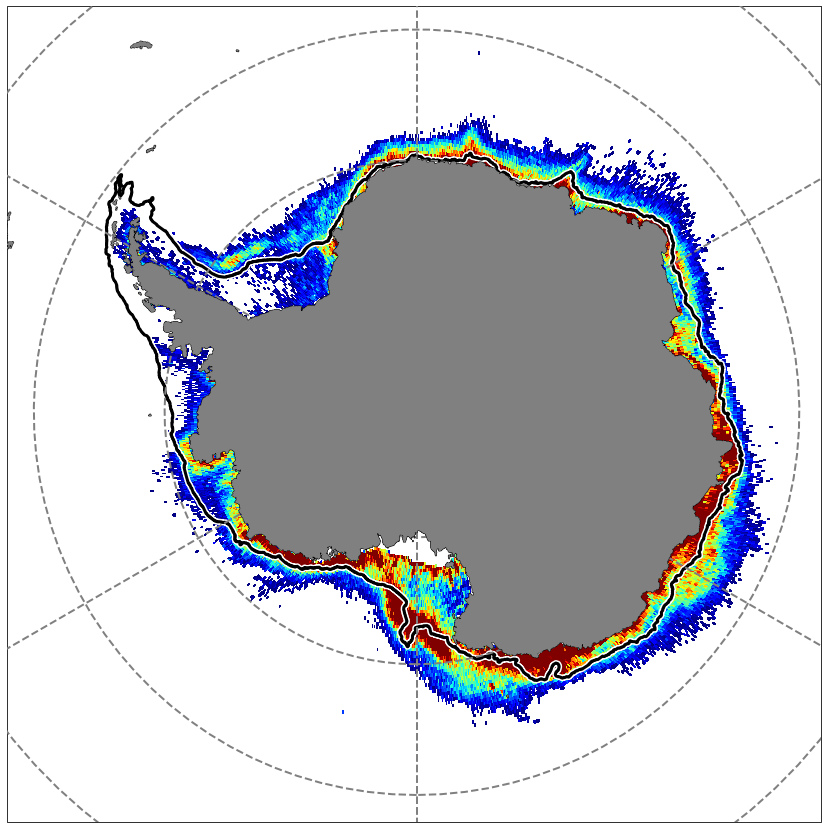

In [27]:
cmin,cmax = 40,400
npts_here = sum(AABW_shallower_than_EZD_plus_CDW)
fig = plt.figure(num=1,figsize=(15,15))
ax = plt.subplot(projection=ccrs.SouthPolarStereo())

c_min,c_max = cmin,cmax
levels = np.arange(cmin,cmax)

xbins,ybins=hist2d_pts_1[1:]

ffmsk = hist2d_pts_69_19.T

#ffmsk[ffmsk<(0.5/1000)*sum(CDW_inds)] = np.nan
ffmsk[ffmsk<40] = np.nan

plt.pcolormesh(xbins,ybins,ffmsk,cmap='jet',vmax=c_max,vmin=c_min,zorder=5,
              transform=ccrs.PlateCarree())

# Isobath and background
X,Y = np.meshgrid(xt_ocean,yt_extend)
ax.contourf(X,Y,np.ma.masked_greater(ocean_depth_extend,0),colors='gray',zorder=11,transform=ccrs.PlateCarree()) #Land Mask cmap=cmap_ice
ax.contour(X, Y,ocean_depth_extend,[1],colors='black',linewidths=0.5,zorder=12,transform=ccrs.PlateCarree()) #isoheight of ocean

ax.set_extent([-180, 180, -90, -58], ccrs.PlateCarree())
#Add 1000m isobath
contour =ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white', transform=ccrs.PlateCarree(),zorder=6,linewidths=6)
contour2 = ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k', transform=ccrs.PlateCarree(),zorder=7,linewidths=3)

# Add contour for specific region
xt_ocean_cc_1 = np.copy(xt_ocean_cc)
xt_ocean_cc_1[xt_ocean_cc_1<0] += 360


# Add grid lines
ax.gridlines(draw_labels=False, linewidth=2, color='gray', alpha=1, linestyle='--',transform=ccrs.PlateCarree(),zorder=10)

#
#plt.title(title)
plt.savefig('Figure_3_a_Heatmap_Cbar_Range_'+str(cmin)+'_'+str(cmax)+'.png',format='png',dpi=300)
plt.show()

# Figure 3 (b-e) Heatmaps

In [23]:
print('point munber along contour:',933504/(12*13))
region_no = (np.array(list(np.arange(1,5985))*13*12)/300).astype(int)+1
wedd_ind =  (region_no<=15) & (region_no>=12)
wedd_ind = wedd_ind[AABW_inds]
print('wedd_ind',sum(wedd_ind))
prydz_ind =  (region_no==20) | (region_no==1)
prydz_ind = prydz_ind[AABW_inds]
print('prydz_ind',sum(prydz_ind))
adelie_ind =  (region_no<=4) & (region_no>=3)
adelie_ind = adelie_ind[AABW_inds]
print('adelie_ind',sum(adelie_ind))
ross_ind =  (region_no<=7) & (region_no>=5)
ross_ind = ross_ind[AABW_inds]
print('ross_ind',sum(ross_ind))

point munber along contour: 5984.0
wedd_ind 22377
prydz_ind 11630
adelie_ind 18886
ross_ind 37312


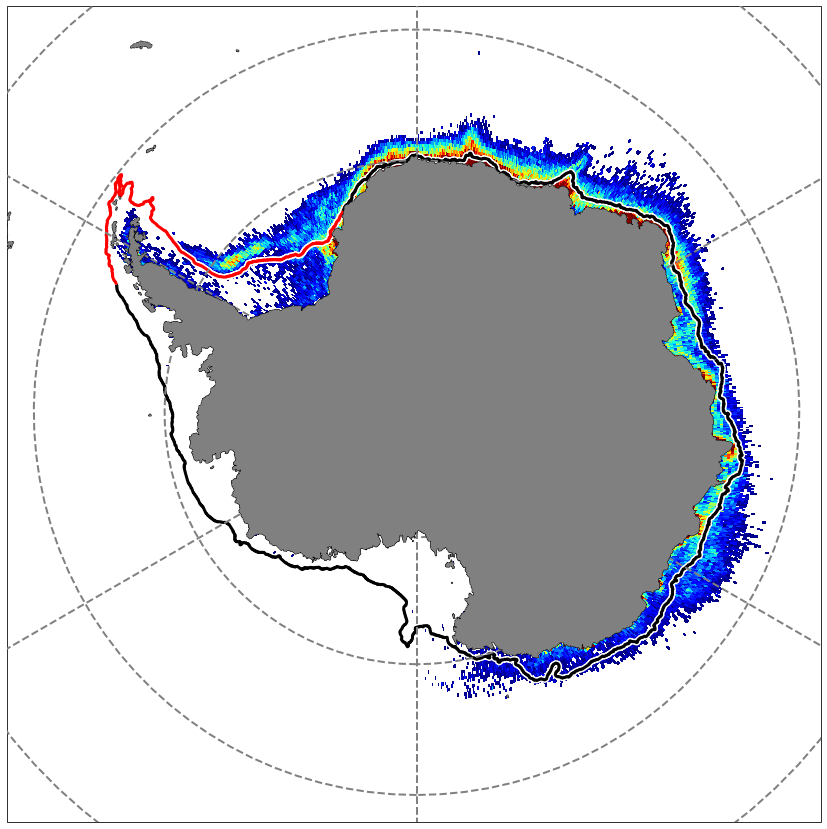

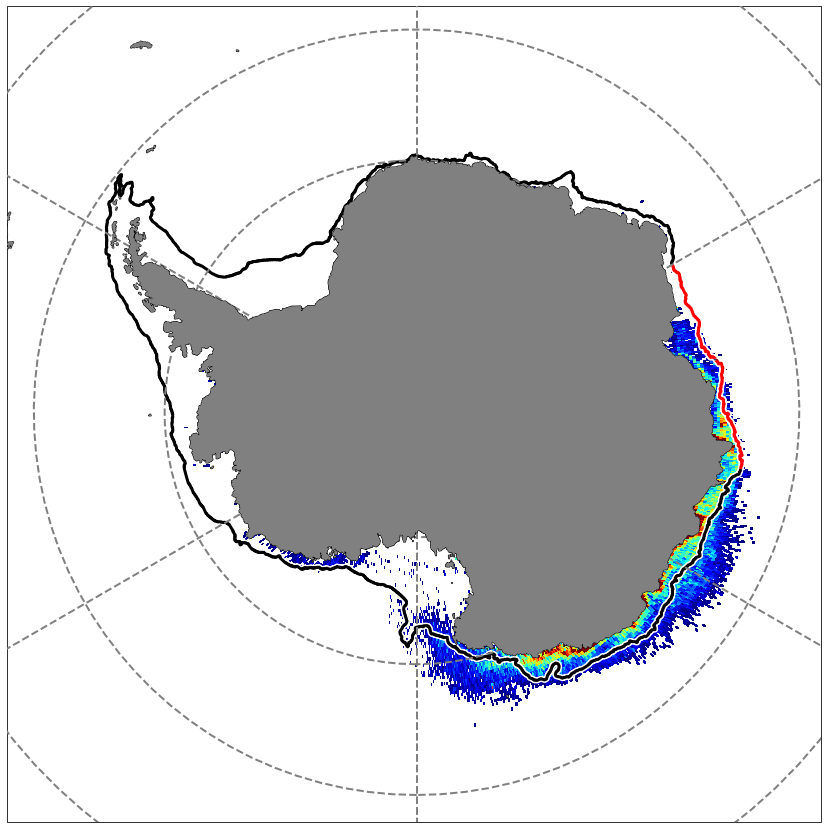

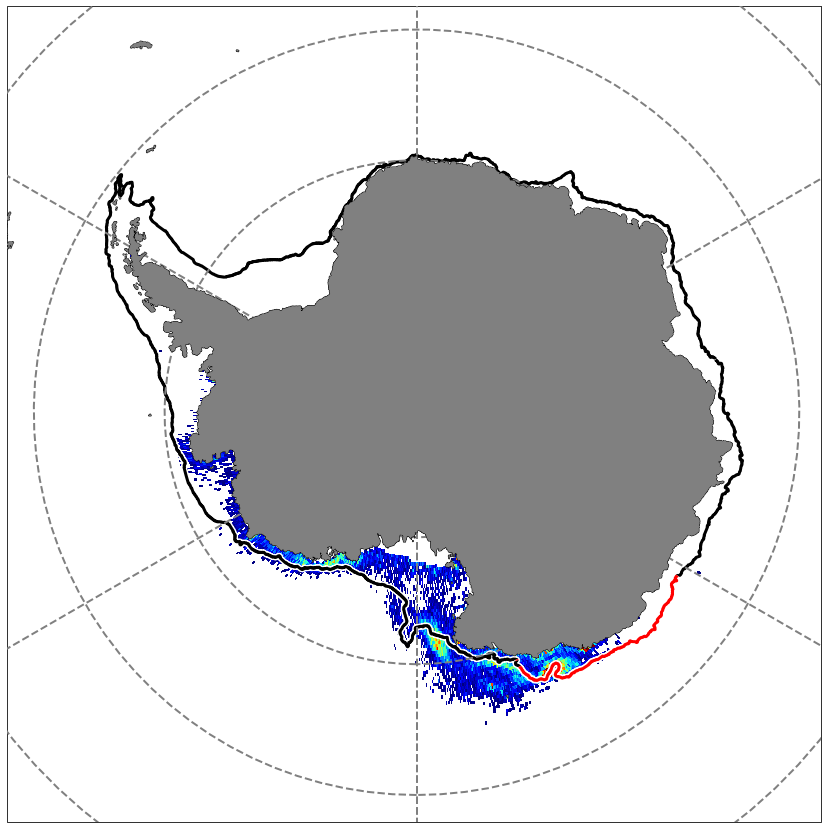

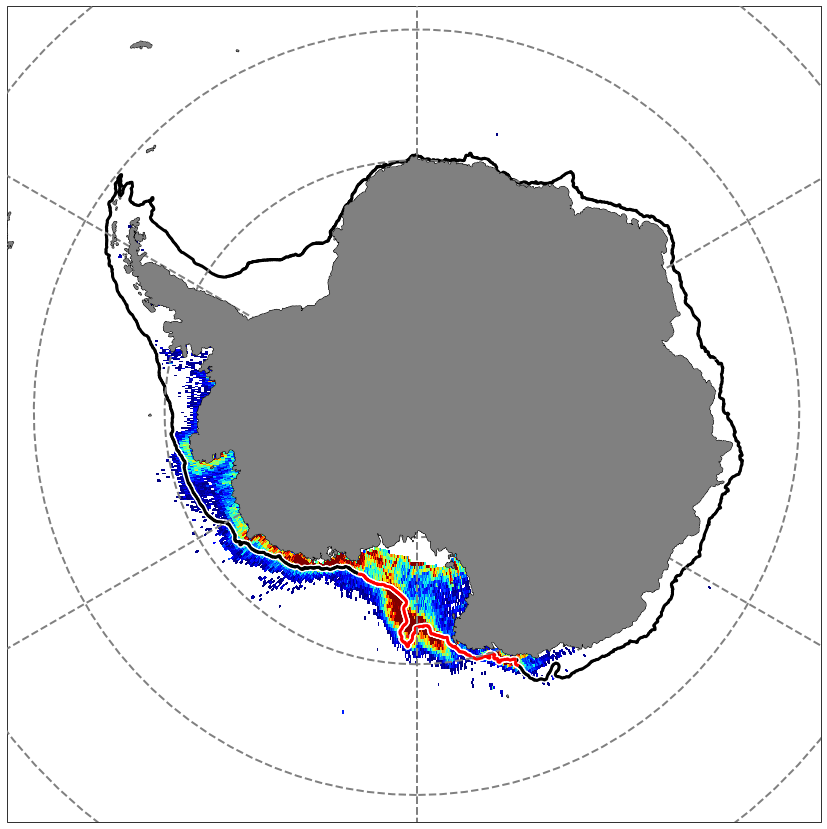

CPU times: user 2min 6s, sys: 13.7 s, total: 2min 20s
Wall time: 2min 27s


In [24]:
%%time
strs = ['Weddell_Sea','Prydz_Bay','Adelie_Coast','Ross_Sea']
i=0
for inds_here in  [wedd_ind,prydz_ind,adelie_ind,ross_ind]:
    npts_here = sum(AABW_shallower_than_EZD_plus_CDW & inds_here)
    #
    PARZ_threshold = 0.433

    # Euphotic residence PDF + Backwards PDF
    # Visualization
    # Global first
    part_inds = AABW_inds #AABW_shallower_than_EZD
    inds_here0 = var_in_arrs_0['PARZ'][inds_here & CDW_inds]>0.433
    res_map_x = np.ravel(var_in_arrs_0['x'][AABW_inds][inds_here & CDW_inds][inds_here0])
    res_map_y = np.ravel(var_in_arrs_0['y'][AABW_inds][inds_here & CDW_inds][inds_here0])
    res_map_z = np.ones(res_map_y.shape)
    hist2d_pts_0 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

    part_inds = AABW_inds #AABW_shallower_than_EZD
    inds_here1 = var_in_arrs_1['PARZ'][inds_here & CDW_inds]>0.433
    res_map_x = np.ravel(var_in_arrs_1['x'][AABW_inds][inds_here & CDW_inds][inds_here1])
    res_map_y = np.ravel(var_in_arrs_1['y'][AABW_inds][inds_here & CDW_inds][inds_here1])
    res_map_z = np.ones(res_map_y.shape)
    hist2d_pts_1 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

    inds_here2 = var_in_arrs_2['PARZ'][:,::20][inds_here & CDW_inds]>0.433
    res_map_x = np.ravel(var_in_arrs_2['x'][AABW_inds][inds_here & CDW_inds][inds_here2])
    res_map_y = np.ravel(var_in_arrs_2['y'][AABW_inds][inds_here & CDW_inds][inds_here2])
    res_map_z = np.ones(res_map_y.shape)
    hist2d_pts_2 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

    inds_here3 = var_in_arrs_3['PARZ'][:,::20][inds_here & CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)]>0.433
    res_map_x = np.ravel(var_in_arrs_3['x'][AABW_inds][inds_here & CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
    res_map_y = np.ravel(var_in_arrs_3['y'][AABW_inds][inds_here & CDW_inds][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
    res_map_z = np.ones(res_map_y.shape)
    hist2d_pts_3 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

    part_inds = AABW_inds #AABW_shallower_than_EZD
    inds_here4 = var_in_arrs_4['PARZ'][:,::20][inds_here & CDW_inds]>0.433
    res_map_x = np.ravel(var_in_arrs_4['x'][AABW_inds][inds_here & CDW_inds][inds_here4])
    res_map_y = np.ravel(var_in_arrs_4['y'][AABW_inds][inds_here & CDW_inds][inds_here4])
    res_map_z = np.ones(res_map_y.shape)
    hist2d_pts_4 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])


    hist2d_pts_69_19 = hist2d_pts_0[0]*5 +hist2d_pts_1[0]*5 + hist2d_pts_2[0]*5 + hist2d_pts_3[0]*5 +hist2d_pts_4[0]*5


    min_thre = 40
    cmin,cmax = min_thre,400
    fig = plt.figure(num=1,figsize=(15,15))
    ax = plt.subplot(projection=ccrs.SouthPolarStereo())

    c_min,c_max = cmin,cmax
    levels = np.arange(cmin,cmax)

    xbins,ybins=hist2d_pts_1[1:]

    ffmsk = hist2d_pts_69_19.T

    #ffmsk[ffmsk<(0.5/1000)*sum(CDW_inds)] = np.nan
    ffmsk[ffmsk<min_thre] = np.nan

    plt.pcolormesh(xbins,ybins,ffmsk,cmap='jet',vmax=c_max,vmin=c_min,zorder=5,
                  transform=ccrs.PlateCarree())

    # Isobath and background
    X,Y = np.meshgrid(xt_ocean,yt_extend)
    ax.contourf(X,Y,np.ma.masked_greater(ocean_depth_extend,0),colors='gray',zorder=11,transform=ccrs.PlateCarree()) #Land Mask cmap=cmap_ice
    ax.contour(X, Y,ocean_depth_extend,[1],colors='black',linewidths=0.5,zorder=12,transform=ccrs.PlateCarree()) #isoheight of ocean

    ax.set_extent([-180, 180, -90, -58], ccrs.PlateCarree())

    #Add 1000m isobath
    contour =ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white', transform=ccrs.PlateCarree(),zorder=6,linewidths=6)
    contour2 = ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k', transform=ccrs.PlateCarree(),zorder=7,linewidths=3)

    # Add contour for specific region
    mem = np.copy(xt_ocean_cc)
    xt_ocean_cc[xt_ocean_cc<0] += 360
    if strs[i] == 'Prydz_Bay':
        xt_ind = (xt_ocean_cc>60) & (xt_ocean_cc<79.9)
        ax.contour(xt_ocean_cc[xt_ind], yt_ocean_cc, shelf_mask.values[:,list(xt_ind)], [0, 1], colors = 'r', transform=ccrs.PlateCarree(),zorder=9,linewidths=3)
        ax.contour(xt_ocean_cc[xt_ind], yt_ocean_cc, shelf_mask.values[:,list(xt_ind)], [0, 1], colors = 'white', transform=ccrs.PlateCarree(),zorder=8,linewidths=6)
        xt_ind = (xt_ocean_cc>80.1) & (xt_ocean_cc<100)
        ax.contour(xt_ocean_cc[xt_ind], yt_ocean_cc, shelf_mask.values[:,list(xt_ind)], [0, 1], colors = 'r', transform=ccrs.PlateCarree(),zorder=9,linewidths=3)
        ax.contour(xt_ocean_cc[xt_ind], yt_ocean_cc, shelf_mask.values[:,list(xt_ind)], [0, 1], colors = 'white', transform=ccrs.PlateCarree(),zorder=8,linewidths=6)
    
    else:
        if strs[i] == 'Adelie_Coast':
            xt_ind = (xt_ocean_cc>122) & (xt_ocean_cc<158)
        elif strs[i] == 'Ross_Sea':
            xt_ind = (xt_ocean_cc>158) & (xt_ocean_cc<200)
        elif strs[i] == 'Weddell_Sea':
            xt_ind = (xt_ocean_cc>293) & (xt_ocean_cc<340)
        ax.contour(xt_ocean_cc[xt_ind], yt_ocean_cc, shelf_mask.values[:,list(xt_ind)], [0, 1], colors = 'r', transform=ccrs.PlateCarree(),zorder=9,linewidths=3)
        ax.contour(xt_ocean_cc[xt_ind], yt_ocean_cc, shelf_mask.values[:,list(xt_ind)], [0, 1], colors = 'white', transform=ccrs.PlateCarree(),zorder=8,linewidths=6)
    xt_ocean_cc = mem
    del mem


    # Add grid lines
    ax.gridlines(draw_labels=False, linewidth=2, color='gray', alpha=1, linestyle='--',transform=ccrs.PlateCarree(),zorder=10)

    #
    #plt.title(title)
    plt.savefig('Figure_3_'+strs[i]+'_Heatmap_Cbar_Range_'+str(cmin)+'_'+str(cmax)+'.png',format='png',dpi=300)
    plt.show()
    
    i+=1

# Figure 1 (b-d)
Probability density (%) maps of particles that spend time in the euphotic zone.

In [28]:
%%time
# Load traj files 0
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0.npz')
var_in_arrs_0['z']   =npzfile['z']

# Load traj files 1
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1.npz')
var_in_arrs_1['z']   =npzfile['z']

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_5days_freq.npz')
var_in_arrs_3['z']   =npzfile['z']

# Load traj files 2
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_5days_freq.npz')
var_in_arrs_2['z']   =npzfile['z']

# Load traj files 4
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_5days_freq.npz')
var_in_arrs_4['z']   =npzfile['z']

CPU times: user 30 s, sys: 3min 59s, total: 4min 29s
Wall time: 5min 38s


In [29]:
# Add initial position
npts_here = sum(AABW_shallower_than_EZD_plus_CDW)
final_y = var_in_arrs_4['z'][AABW_inds][AABW_shallower_than_EZD_plus_CDW ][:,-1]
final_x = var_in_arrs_4['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW ][:,-1]

final_pts = np.histogram2d(final_x,final_y,bins=[np.arange(-80,-25,1),np.arange(0,6000,100)])
xbins,ybins=(final_pts[1][1:]+final_pts[1][:-1])/2,(final_pts[2][1:]+final_pts[2][:-1])/2

final_pts_masked = np.ma.masked_where(final_pts[0] < 3*npts_here/10000, final_pts[0])

# Add final position
npts_here = sum(AABW_shallower_than_EZD_plus_CDW)
initial_y = var_in_arrs_0['z'][AABW_inds][AABW_shallower_than_EZD_plus_CDW ][:,-1]
initial_x = var_in_arrs_0['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW ][:,-1]

initial_pts = np.histogram2d(initial_x,initial_y,bins=[np.arange(-80,-25,1),np.arange(0,6000,100)])
xbins,ybins=(final_pts[1][1:]+final_pts[1][:-1])/2,(final_pts[2][1:]+final_pts[2][:-1])/2

initial_pts_masked = np.ma.masked_where(initial_pts[0] < 3*npts_here/10000, initial_pts[0])

## Figure 1 (b)

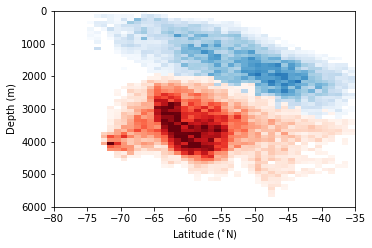

In [30]:
plt.figure(figsize=(5.4,3.6))
plt.pcolormesh(xbins,ybins,initial_pts_masked.T,vmin=3*npts_here/10000,vmax=3*npts_here/1000,cmap='Reds',alpha=1,zorder=2)

plt.pcolormesh(xbins,ybins,final_pts_masked.T,vmin=3*npts_here/10000,vmax=3*npts_here/1000,cmap='Blues',alpha=1,zorder=1)

plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylabel('Depth (m)')

plt.xlim([-80,-35])
plt.ylim([6000,0])
plt.savefig('Figure_1_b.png',dpi=500)

# Figure 1 (c-d)

In [31]:
# Add initial position
npts_here = sum(AABW_shallower_than_EZD_plus_CDW)
final_y = var_in_arrs_4['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW ][:,-1]
final_x = var_in_arrs_4['x'][AABW_inds][AABW_shallower_than_EZD_plus_CDW ][:,-1]

final_pts = np.histogram2d(final_x,final_y,bins=[np.arange(0,361,3),np.arange(-80,-29,3)])
xbins,ybins=(final_pts[1][1:]+final_pts[1][:-1])/2,(final_pts[2][1:]+final_pts[2][:-1])/2

final_pts_masked = np.ma.masked_where(final_pts[0] < 3*npts_here/10000, final_pts[0])

# Add final position
npts_here = sum(AABW_shallower_than_EZD_plus_CDW)
initial_y = var_in_arrs_0['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW ][:,-1]
initial_x = var_in_arrs_0['x'][AABW_inds][AABW_shallower_than_EZD_plus_CDW ][:,-1]

initial_pts = np.histogram2d(initial_x,initial_y,bins=[np.arange(0,361,3),np.arange(-80,-29,3)])
xbins,ybins=(final_pts[1][1:]+final_pts[1][:-1])/2,(final_pts[2][1:]+final_pts[2][:-1])/2

initial_pts_masked = np.ma.masked_where(initial_pts[0] < 3*npts_here/10000, initial_pts[0])

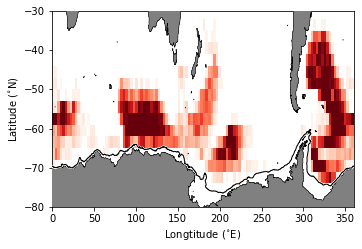

In [32]:
plt.figure(figsize=(5.4,3.6))
plt.pcolormesh(xbins,ybins,initial_pts_masked.T,vmin=3*npts_here/10000,vmax=3*npts_here/1000,cmap='Reds',alpha=1,zorder=1)
#plt.colorbar()



# Isobath and background
X,Y = np.meshgrid(xt_ocean,yt_extend)
plt.contourf(X,Y,np.ma.masked_greater(ocean_depth_extend,0),colors='gray',zorder=11) #Land Mask cmap=cmap_ice
plt.contour(X, Y,ocean_depth_extend,[1],colors='black',linewidths=0.5,zorder=12) #isoheight of ocean

#plt.pcolormesh(xt_ocean,yt_extend[:1141],ocean_depth_extend[:1141,:],vmin=-1000,vmax=7000,cmap='bone_r',zorder=0)

#Add 1000m isobath
plt.contour(xt_ocean+80, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white',zorder=16,linewidths=2)
plt.contour(xt_ocean+80, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k',zorder=17,linewidths=1)
plt.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white',zorder=16,linewidths=2)
plt.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k',zorder=17,linewidths=1)


plt.ylabel('Latitude ($^{\circ}$N)')
plt.xlabel('Longtitude ($^{\circ}$E)')
plt.xlim([0,360])
plt.ylim([-80,-30])
plt.savefig('Figure_1_d.png',dpi=500)

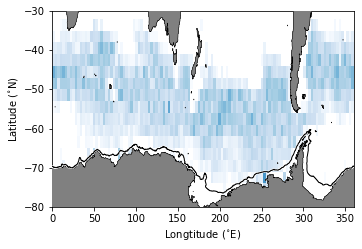

In [33]:
plt.figure(figsize=(5.4,3.6))
plt.pcolormesh(xbins,ybins,final_pts_masked.T,vmin=3*npts_here/10000,vmax=3*npts_here/1000,cmap='Blues',alpha=1,zorder=1)

#plt.colorbar()



# Isobath and background
X,Y = np.meshgrid(xt_ocean,yt_extend)
plt.contourf(X,Y,np.ma.masked_greater(ocean_depth_extend,0),colors='gray',zorder=11) #Land Mask cmap=cmap_ice
plt.contour(X, Y,ocean_depth_extend,[1],colors='black',linewidths=0.5,zorder=12) #isoheight of ocean

#plt.pcolormesh(xt_ocean,yt_extend[:1141],ocean_depth_extend[:1141,:],vmin=-1000,vmax=7000,cmap='bone_r',zorder=0)
#Add 1000m isobath
plt.contour(xt_ocean+80, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white',zorder=16,linewidths=2)
plt.contour(xt_ocean+80, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k',zorder=17,linewidths=1)
plt.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white',zorder=16,linewidths=2)
plt.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k',zorder=17,linewidths=1)


plt.ylabel('Latitude ($^{\circ}$N)')
plt.xlabel('Longtitude ($^{\circ}$E)')
plt.xlim([0,360])
plt.ylim([-80,-30])
plt.savefig('Figure_1_c.png',dpi=500)

# Figure 1. an unadopted subplot:
Zonal average of euphotic zone cumulative residence time along the 1) Latitude; 2) Distance to 1000m isobath contour

## Zonal average of euphotic zone cumulative residence time along the Latitude axis

In [34]:
%%time
res_map_x = np.ravel(np.concatenate((var_in_arrs_4['x'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_3['x'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_2['x'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_1['x'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_0['x'][AABW_inds][AABW_shallower_than_EZD_plus_CDW]),axis=1),order='C')
res_map_y = np.ravel(np.concatenate((var_in_arrs_4['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_3['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_2['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_1['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_0['y'][AABW_inds][AABW_shallower_than_EZD_plus_CDW]),axis=1),order='C')
res_map_z = np.ravel(np.concatenate((var_in_arrs_4['z'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_3['z'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_2['z'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_1['z'][AABW_inds][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_0['z'][AABW_inds][AABW_shallower_than_EZD_plus_CDW]),axis=1),order='C')

res_map_z1 = np.ravel(np.concatenate((var_in_arrs_4['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_3['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_2['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_1['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW],var_in_arrs_0['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW]),axis=1),order='C')

hist3d = np.histogramdd([res_map_x,res_map_y,res_map_z],bins=[np.arange(0,360.25,1),np.arange(-80,-29.9,1/2),np.arange(0,6000,25)],weights=res_map_z1)
hist3d_pts = np.histogramdd([res_map_x,res_map_y,res_map_z],bins=[np.arange(0,360.25,1),np.arange(-80,-29.9,1/2),np.arange(0,6000,25)])

CPU times: user 26.3 s, sys: 2min 13s, total: 2min 40s
Wall time: 2min 48s


(6000.0, 0.0)

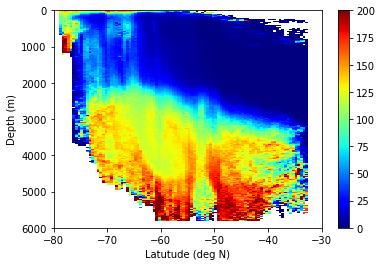

In [36]:
xbins,ybins = (hist3d[1][1][1:]+hist3d[1][1][:-1])/2,(hist3d[1][2][1:]+hist3d[1][2][:-1])/2
plt.pcolormesh(xbins,ybins,(np.nanmean(hist3d[0][:,:,:],axis=0)/np.nanmean(hist3d_pts[0][:,:,:],axis=0)).T,vmin=0,vmax=200,cmap='jet')
plt.colorbar()
plt.xlabel('Latutude (deg N)')
plt.ylabel('Depth (m)')
plt.ylim([6000,0])

In [37]:
distance_to_1000isobath = xr.open_dataset('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/distance_to_1000isobath.nc')
dis_100iso_data = np.concatenate((distance_to_1000isobath.sel(xt_ocean = distance_to_1000isobath.xt_ocean>=0).__xarray_dataarray_variable__.data,distance_to_1000isobath.sel(xt_ocean = distance_to_1000isobath.xt_ocean<0).__xarray_dataarray_variable__.data),axis=1)


In [38]:
from scipy.interpolate import griddata
# Define the x-y grid to interpolate onto
x = (hist3d[1][0][1:]+hist3d[1][0][:-1])/2
y = (hist3d[1][1][1:]+hist3d[1][1][:-1])/2
xy = np.meshgrid(x, y)
xy_mesh = np.meshgrid(x, y)
xy = np.stack((xy[0].ravel(), xy[1].ravel()), axis=1)

# Get the data and its x-y coordinates
data = np.ravel(dis_100iso_data)
x_coords = distance_to_1000isobath.xt_ocean.values
x_coords = np.concatenate((x_coords[x_coords>=0],360+x_coords[x_coords<0]))
y_coords = distance_to_1000isobath.yt_ocean.values
X_coords,Y_coords = np.meshgrid(x_coords,y_coords)
X_coords,Y_coords = X_coords.ravel(),Y_coords.ravel()

# Interpolate the data onto the new x-y grid
interp_data = griddata((X_coords,Y_coords), data, xy, method='linear')

# Reshape the interpolated data to the x-y grid shape
interp_data = interp_data.reshape((len(y), len(x)))

Text(0.5, 1.0, 'Distance to 1000m isobath contour (km)')

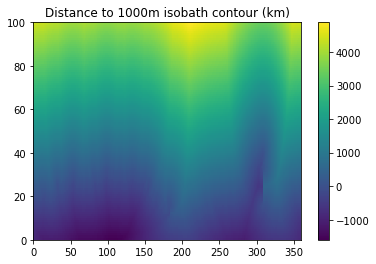

In [39]:
plt.pcolormesh(interp_data)
plt.colorbar()
plt.title('Distance to 1000m isobath contour (km)')

### Interpolate hist3d into new 'distance to 1000m isobath (in km)' coordinate system

In [41]:
%%time
hist2d_x = []
hist2d_pts_x = []
ind = []

for i in np.arange(360):
    ind.append(i)
    # Define the original x-y grid
    x =  interp_data[:,i]
    y = ybins
    xv, yv = np.meshgrid(y,x)
    data = hist3d[0][i,:,:]/hist3d_pts[0][i,:,:]
    mask = ~np.isnan(data.ravel())

    res_map_x = yv.ravel(order='C')[mask]
    res_map_y = xv.ravel(order='C')[mask]
    res_map_z = data.ravel(order='C')[mask]

    hist2d_x.append(np.histogram2d(res_map_x,res_map_y,bins=[np.arange(-1500,5000,60),np.arange(0,6000,25)],weights=res_map_z)[0])
    hist2d_pts_x.append(np.histogram2d(res_map_x,res_map_y,bins=[np.arange(-1500,5000,60),np.arange(0,6000,25)])[0])


CPU times: user 387 ms, sys: 154 ms, total: 541 ms
Wall time: 538 ms


In [42]:
hist2d_x_mean = np.nanmean(np.array(hist2d_x),axis=0)
hist2d_pts_x_mean = np.nanmean(np.array(hist2d_pts_x),axis=0)

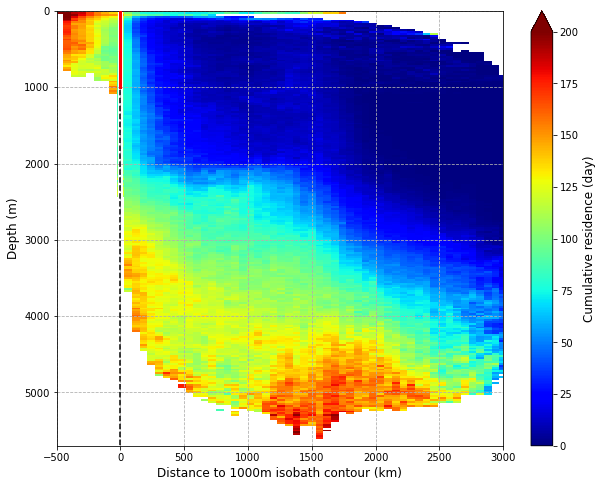

In [43]:
hist2d_x_mean_masked = np.ma.masked_where(hist2d_pts_x_mean < 0.1, hist2d_x_mean)

plt.figure(figsize=(10,8))
plt.pcolormesh(np.arange(-1500,5000,60)[1:],np.arange(0,6000,25)[1:],(hist2d_x_mean_masked[:,:]/hist2d_pts_x_mean[:,:]).T,vmin=0,vmax=200,cmap='jet')
plt.plot([0,0],[1000,0],'r-',zorder=3,linewidth=3)
plt.plot([0,0],[6000,0],'k--',zorder=2)
plt.plot([0,0],[6000,0],color='white',zorder=1,linewidth=5)
plt.ylim([5700,0])
plt.xlim([-500,3000])
plt.grid(linestyle='--')
plt.xlabel('Distance to 1000m isobath contour (km)', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)
cbar = plt.colorbar(extend='max')
cbar.set_label('Cumulative residence (day)', fontsize=12)
plt.savefig('Fig1_residence_PDF_in_isobath_distance.png',dpi=500)